### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score


### Import dataset 

In [2]:
dfHouse = pd.read_csv('House_Rent_Dataset.csv')
dfHouse.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Mengecek info dari dataset

In [3]:
dfHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### Mengecek nilai null dan duplikat

In [4]:
print(dfHouse.isna().sum())
print(dfHouse.duplicated().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64
0


### Scaling data, menghapus kolom yang tidak relevan, dan encoding data kategorikal

In [5]:
# Scaling data numerik
mm_scaler = MinMaxScaler()
dfHouse[["BHK","Rent","Size","Bathroom"]] = mm_scaler.fit_transform(dfHouse[["BHK","Rent","Size","Bathroom"]])

# Menghapus column tanggal
dfHouse.drop(['Posted On'], axis=1, inplace=True)

# Encoding column Kategorikal
col=['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Point of Contact', 'Tenant Preferred']
le=LabelEncoder()
for i in col:
    dfHouse[i]=le.fit_transform(dfHouse[i])

dfHouse.head(10)


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,0.2,0.002515,0.136421,455,2,221,4,2,1,0.111111,2
1,0.2,0.005373,0.098874,14,2,1527,4,1,1,0.000000,2
2,0.2,0.004516,0.123905,14,2,1760,4,1,1,0.000000,2
3,0.2,0.002515,0.098874,10,2,526,4,2,1,0.000000,2
4,0.2,0.001801,0.105131,10,1,1890,4,2,0,0.000000,2
5,0.2,0.001658,0.073842,447,2,1975,4,2,1,0.111111,2
6,0.2,0.002515,0.086358,458,2,1184,4,2,0,0.111111,0
7,0.0,0.001086,0.030038,10,2,1184,4,2,0,0.000000,0
8,0.2,0.007088,0.098874,10,1,1476,4,2,0,0.111111,0
9,0.2,0.002515,0.123905,14,1,1358,4,1,1,0.111111,2


### Menentukan target dan feature

In [6]:
#Feature
x = dfHouse[['BHK','Rent','Size','Floor','Area Type','Furnishing Status',]]

#Target
y = dfHouse['Tenant Preferred'] 

### Train Test Split data

In [7]:
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Membuat model dengan metode Sequential & melakukan Model Compile

In [8]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[6]), #Input Layer
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Output Layer
])

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Melatih model

In [9]:

model.fit(X_train, y_train, epochs = 20,validation_split=0.2)

Epoch 1/20
84/84 [==============================] - 1s 4ms/step - loss: 22.1390 - accuracy: 0.4321 - val_loss: 0.8616 - val_accuracy: 0.7429
Epoch 2/20
84/84 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.7207 - val_loss: 0.3006 - val_accuracy: 0.7429
Epoch 3/20
84/84 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.7207 - val_loss: 0.2928 - val_accuracy: 0.7429
Epoch 4/20
84/84 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.7207 - val_loss: 0.2781 - val_accuracy: 0.7429
Epoch 5/20
84/84 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.7207 - val_loss: 0.2671 - val_accuracy: 0.7429
Epoch 6/20
84/84 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.7207 - val_loss: 0.2685 - val_accuracy: 0.7429
Epoch 7/20
84/84 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.7207 - val_loss: 0.2687 - val_accuracy: 0.7429
Epoch 8/20
84/84 [=

### Evaluasi model

In [10]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.7268


[0.2553046941757202, 0.7268258333206177]

In [11]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).reshape(-1)

45/45 [==============================] - 0s 864us/step


In [12]:
accuracy_score(y_test, y_pred)

0.7268258426966292

## **Grafik**

### Accuracy model

Epoch 1/20
748/748 [==============================] - 1s 1ms/step - loss: 0.4834 - accuracy: 0.7156 - val_loss: 0.2288 - val_accuracy: 0.7357
Epoch 2/20
748/748 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.7216 - val_loss: 0.2144 - val_accuracy: 0.7357
Epoch 3/20
748/748 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.7213 - val_loss: 0.3581 - val_accuracy: 0.7357
Epoch 4/20
748/748 [==============================] - 1s 2ms/step - loss: 0.3060 - accuracy: 0.7210 - val_loss: 0.2434 - val_accuracy: 0.7357
Epoch 5/20
748/748 [==============================] - 1s 1ms/step - loss: 0.3343 - accuracy: 0.7190 - val_loss: 0.3714 - val_accuracy: 0.7357
Epoch 6/20
748/748 [==============================] - 1s 2ms/step - loss: 0.3147 - accuracy: 0.7196 - val_loss: 0.2853 - val_accuracy: 0.7267
Epoch 7/20
748/748 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.7183 - val_loss: 0.4419 - val_accuracy: 0.7357
Epoch 

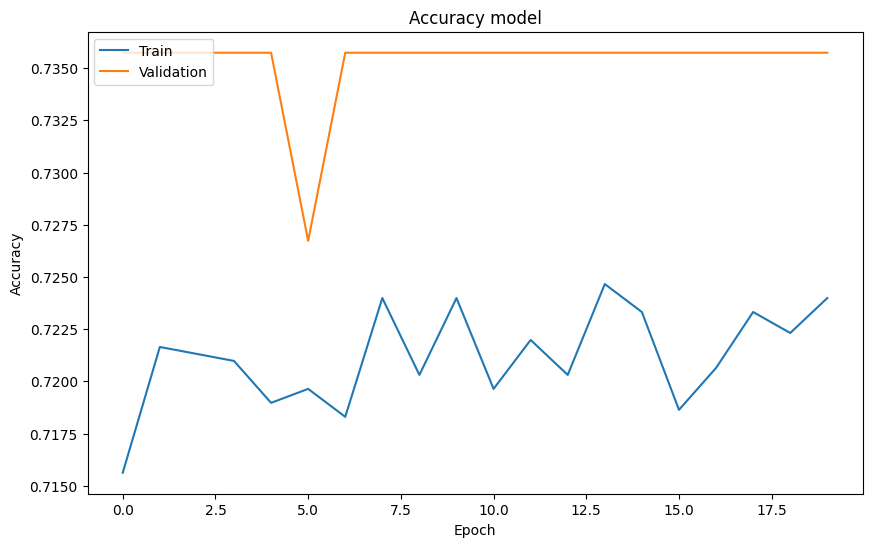

In [13]:
plt.figure(figsize=(10, 6))
history = model.fit(X_train, y_train, validation_split= 0.1, epochs=20, batch_size=4)
plt.plot(history.history["accuracy"], label='Train Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy') 
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Loss Model

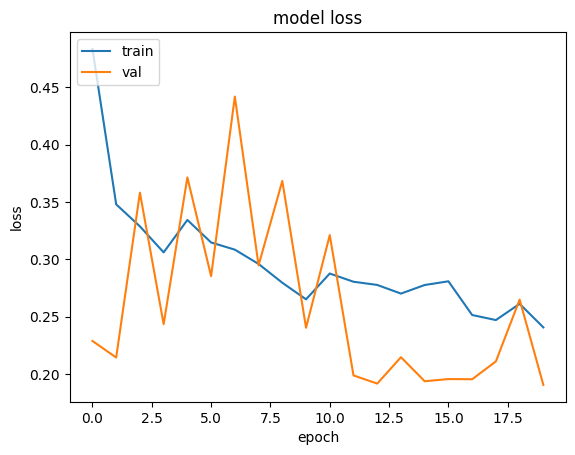

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()